# Outliers

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import numpy as np
from datetime import datetime

Al guardar el dataset en la sección anterior, pandas agrega una columna `Unnamed: 0` con los indices de las filas, esta columna no nos es util por lo cual la eliminamos al cargar el dataset

In [3]:
stage_1_data = pd.read_csv('../data/bus_data_stage_1.csv')
stage_1_data = stage_1_data.drop(['Unnamed: 0'], axis=1)
stage_1_data.head()

,id,line,longitude,latitude,timestamp
0,76,217,-56.222400,-34.855885,2018-10-02 14:38:53
1,984,540,-56.201860,-34.909360,2018-10-02 14:39:08
2,288,7898,-56.175415,-34.901110,2018-10-02 14:39:08
3,1111,254,-56.136640,-34.872833,2018-10-02 14:39:08
4,22,540,-56.135277,-34.845554,2018-10-02 14:39:08


Vemos los diferentes tipos de datos con los que estamos trabajando

In [4]:
stage_1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96496 entries, 0 to 96495
Data columns (total 5 columns):
id           96496 non-null int64
line         96496 non-null int64
longitude    96496 non-null float64
latitude     96496 non-null float64
timestamp    96496 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 3.7+ MB


Reordenamos el dataset y vemos algunas medidas estadisticas de los datos

In [5]:
_ = pd.DataFrame(columns=['id', 'line', 'longitude', 'latitude', 'timestamp'])
_.id   = stage_1_data.id
_.line = stage_1_data.line
_.longitude  = stage_1_data.longitude
_.latitude   = stage_1_data.latitude
_.timestamp  = stage_1_data.timestamp
stage_1_data = pd.DataFrame(_)
del _

In [6]:
stage_1_data.describe()

,id,line,longitude,latitude
count,96496.000000,96496.000000,96496.000000,96496.000000
mean,348.944153,2671.002933,-56.147596,-34.875496
std,368.219358,3113.855989,0.038840,0.029654
min,2.000000,217.000000,-56.256016,-34.928585
25%,53.000000,266.000000,-56.174942,-34.900887
50%,110.000000,565.000000,-56.148083,-34.881416
75%,709.000000,7516.000000,-56.128693,-34.863860
max,1111.000000,7929.000000,-55.995388,-34.715830


![Montevideo](images/montevideo.png)

Sabemos que montevideo esta contenido en una _Bounding Box_ con las siguientes coordenadas:

Izquierda: **-56.434944**

Derecha  : **-56.015140**

Arriba   : **-34.696519**

Abajo    : **-34.938120**

In [7]:
UPPER_BOUND, LOWER_BOUND, RIGHT_BOUND, LEFT_BOUND = [-34.696519, -34.938120, -56.015140,  -56.434944]
UPPER_LAT = stage_1_data.latitude.max()
LOWER_LAT = stage_1_data.latitude.min()
RIGHT_LON = stage_1_data.longitude.max()
LEFT_LON  = stage_1_data.longitude.min()
print('Max Latitude: {0}\nMin Latitude: {1}\nMax Longitude: {2}\nMin Longitude: {3}\n'
      .format(UPPER_LAT, LOWER_LAT, RIGHT_LON, LEFT_LON))
print('Upper boundin is OK') if UPPER_LAT <= UPPER_BOUND else print('Upper boundin is WRONG with difference: {0}'
                                                                         .format(abs(UPPER_BOUND-UPPER_LAT)))
print('Lower boundin is OK') if LOWER_LAT >= LOWER_BOUND else print('Lower boundin is WRONG with difference: {0}'
                                                                         .format(abs(LOWER_BOUND-LOWER_LAT)))
print('Right boundin is OK') if RIGHT_LON <= RIGHT_BOUND else print('Right boundin is WRONG with difference: {0}'
                                                                         .format(abs(RIGHT_BOUND-RIGHT_LON)))
print('Left boundin is OK') if LEFT_LON >= LEFT_BOUND else print('Left  boundin is WRONG with difference: {0}'
                                                                         .format(abs(LEFT_BOUND-LEFT_LON)))

Max Latitude: -34.71583
Min Latitude: -34.928585
Max Longitude: -55.995388
Min Longitude: -56.256016

Upper boundin is OK
Lower boundin is OK
Right boundin is WRONG with difference: 0.01975200000000399
Left boundin is OK


Podemos ver que tenemos coordenadas que se salen de la bounding box de Monteivode, esto puede ser por algunas lieas que comienzan o terminan fuera de Montevideo. Ahora vamos a ver cuales son las cordenadas que estan por fuera.

In [8]:
right_bound_violations = stage_1_data[stage_1_data.longitude >= RIGHT_BOUND]
right_bound_violations.describe()

,id,line,longitude,latitude
count,134.000000,134.000000,134.000000,134.000000
mean,416.820896,4853.567164,-56.004511,-34.864850
std,203.151962,3499.197086,0.005954,0.003143
min,249.000000,863.000000,-56.015137,-34.870777
25%,252.000000,863.000000,-56.009283,-34.867215
50%,267.000000,7899.000000,-56.003277,-34.864445
75%,545.000000,7899.000000,-55.999534,-34.862208
max,756.000000,7899.000000,-55.995388,-34.859890


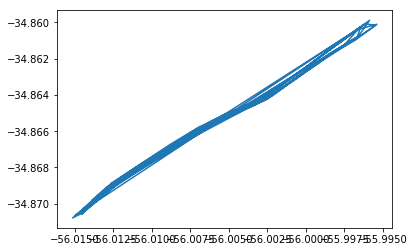

In [9]:
plt.plot(right_bound_violations.longitude,
         right_bound_violations.latitude)

Podemos ver que es la linea 142 que llega hasta la terminal ANCAP de la ciudad de la costa por lo cual no es un outlier.

![Montevideo](images/right_bound_error.png)

![Montevideo](images/right_bound_error_2.png)

Ahora que sabemos que no existen outliers fuera de montevideo revisaremos las lineas de forma independiente

## Outliers por linea

Primero tenemos que agrupar por linea los datos

In [10]:
data_sorted_by_line = stage_1_data.sort_values(by='line')
lines = data_sorted_by_line.line.unique()
data_sorted_by_line.head()

,id,line,longitude,latitude,timestamp
0,76,217,-56.222400,-34.855885,2018-10-02 14:38:53
45991,13,217,-56.116450,-34.871450,2018-10-02 16:06:25
45998,99,217,-56.155420,-34.883700,2018-10-02 16:06:25
46008,29,217,-56.222800,-34.855732,2018-10-02 16:06:25
46017,105,217,-56.083332,-34.882200,2018-10-02 16:06:25


In [11]:
line_numbers = data_sorted_by_line.line.unique()
print('Lines are:')
line_numbers

Lines are:


array([ 217,  218,  227,  231,  236,  237,  242,  254,  266,  272,  340,
        341,  342,  343,  344,  345,  372,  386,  389,  395,  400,  403,
        498,  501,  522,  540,  542,  565,  566,  863,  873, 1476, 1483,
       1922, 2388, 2390, 2391, 2392, 2393, 2402, 2403, 2408, 2409, 2422,
       2454, 2601, 2775, 2924, 7512, 7516, 7517, 7526, 7528, 7529, 7533,
       7703, 7704, 7898, 7899, 7902, 7903, 7918, 7919, 7920, 7921, 7926,
       7927, 7928, 7929])

In [12]:
lines = {}

for line_number in line_numbers:
    lines[line_number] = stage_1_data[stage_1_data.line==line_number]

Ahora tenemos un diccionaro de la forma { **linea** : _informacionde-la-linea_ }

Vamos a crear algunas funciones para facilitar la busqueda de outliers.

In [157]:
def plot_line(line):
    plt.figure(figsize=(10,5))
    plt.title('Line {0}'.format(line.line.iloc[0]))
    plt.plot(line.longitude, line.latitude,'-o')
    plt.show()

def plot_ids_line(line):
    line_ids = line.id.unique()
    plt.figure(figsize=(10,5))
    plt.title(line.line.iloc[0])
    different_ids = len(line_ids)
    colors = pl.cm.jet(np.linspace(0,1,different_ids))
    for size, id_ in enumerate(line_ids):
        l = line[line.id == id_]
        plt.plot(l.longitude, l.latitude, '-o', color=colors[size],markersize=(different_ids-size)*3)
    plt.show()
    
def plot_line_speed(line):
    line_ids = line.id.unique()
    plt.figure(figsize=(17,6))
    plt.title(line.line.iloc[0])
    line.drop(line.index[-1], inplace=True)
    max_speed = int(line.speed.max())
    min_speed = int(line.speed.min())
    speeds = max_speed - min_speed 
    colors = pl.cm.jet(np.linspace(0, 1, speeds + 1))
    sps = []
    for step in line.itertuples():
        plt.plot(step.longitude, step.latitude, '-o', color=colors[int(step.speed)],markersize=step.speed)
        sps.append(str(int(ms_to_kh(step.speed)))+' k/h')
    plt.legend(sps[:20])
    plt.legend(sps[:20])
    plt.show()
    
def ms_to_kh(ms):
    return (ms*18)/5

Ahora vamos a mostrar graficamente los reorridos
las prineras 10 lineas.

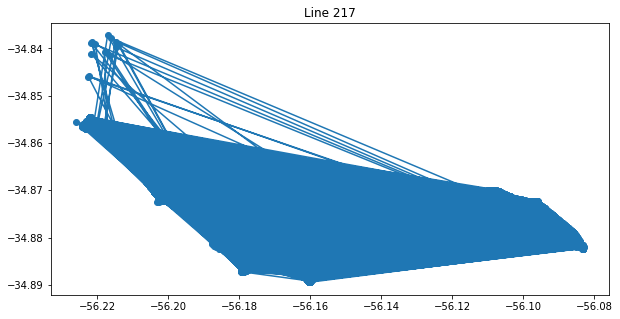

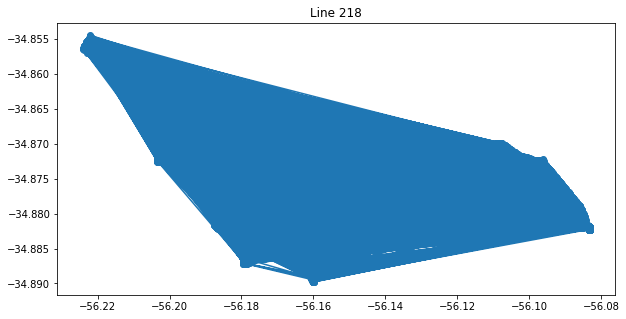

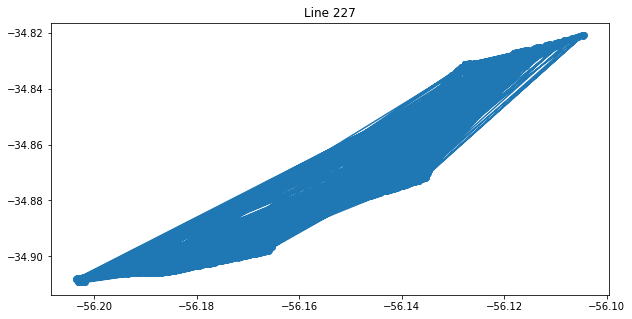

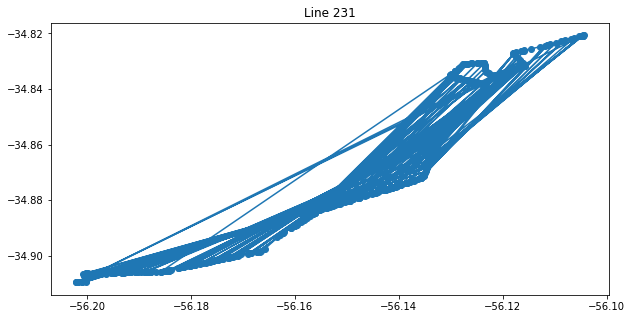

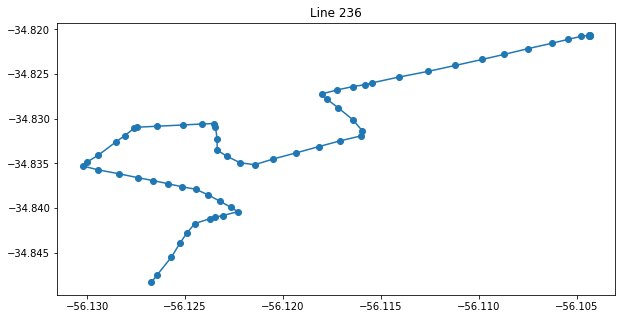

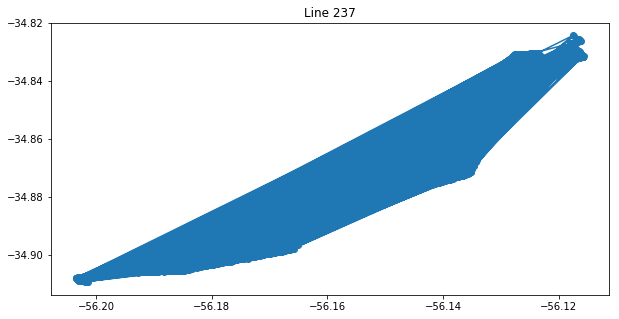

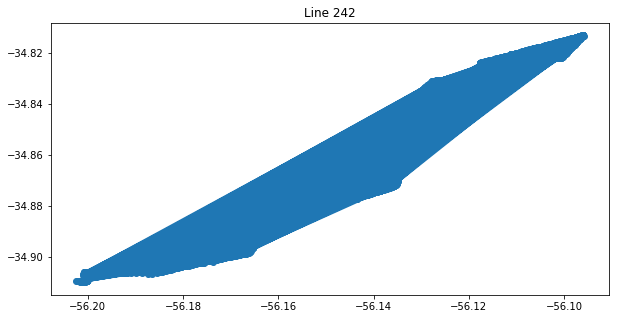

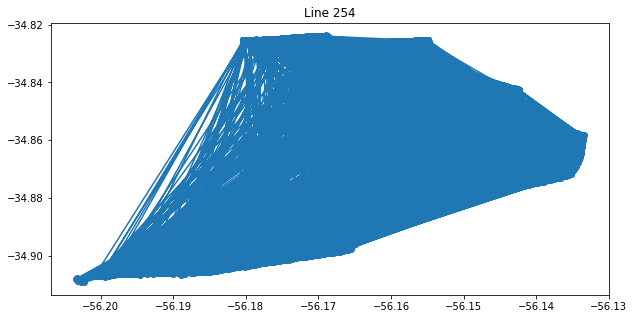

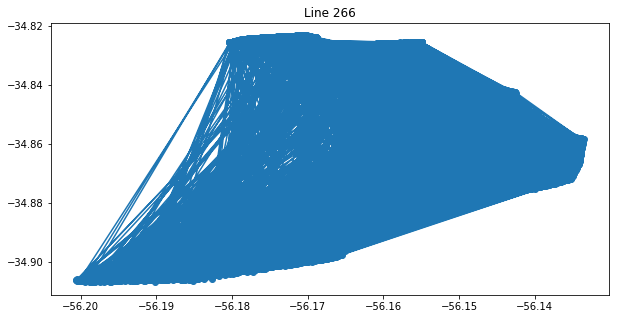

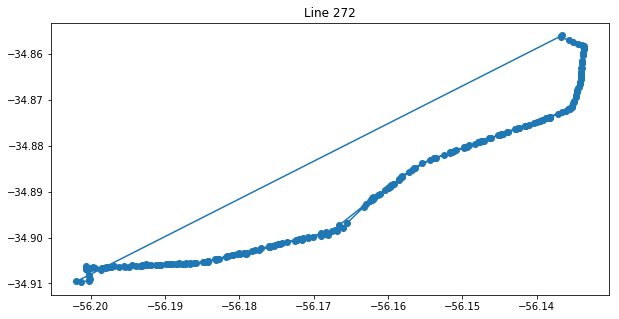

In [158]:
for line_number in line_numbers[:10]:
    plot_line(lines[line_number])

Podemos ver que tenemos un problema con la mayoria de las lineas, vamos a analizarlo tomando la linea 1476.

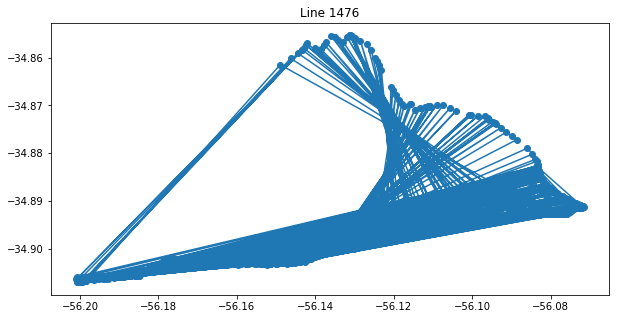

In [159]:
line_1476 = lines[1476] 
plot_line(line_1476)

Vamos a ordenarlos por tiempo

In [160]:
line_1476 = line_1476.sort_values(by='timestamp')
line_1476.head()

,id,line,longitude,latitude,timestamp
10,285,1476,-56.169277,-34.903220,2018-10-02 14:39:08
60,263,1476,-56.082610,-34.884945,2018-10-02 14:39:08
110,525,1476,-56.080530,-34.892750,2018-10-02 14:39:08
155,962,1476,-56.186860,-34.905610,2018-10-02 14:39:08
210,263,1476,-56.083195,-34.883390,2018-10-02 14:39:23


Podemos ver que el problema esta ocacioando por tener tiempos de varios omnibus, asi que intentamos graficarlos nuevamente pero filtrando por id.

In [161]:
print('Unique ids for line 1476 are:')
line_1476_ids = line_1476.id.unique()
line_1476_ids

Unique ids for line 1476 are:


array([285, 263, 525, 962, 570, 276, 969, 589, 262, 275])

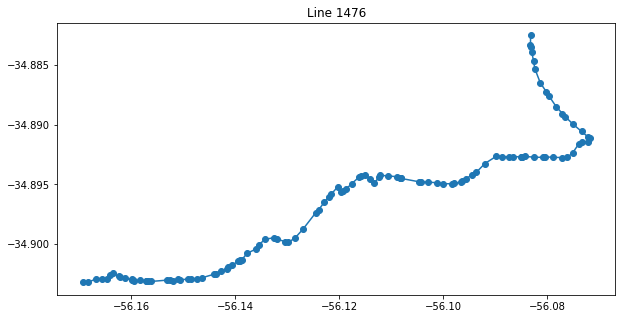

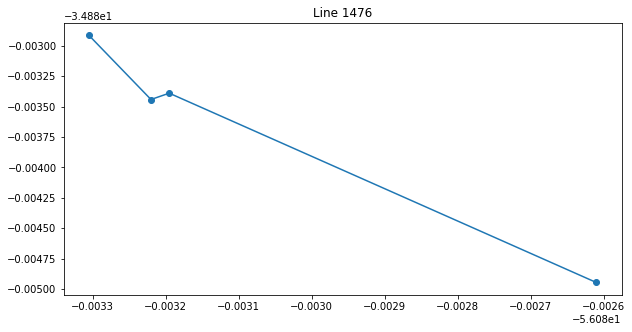

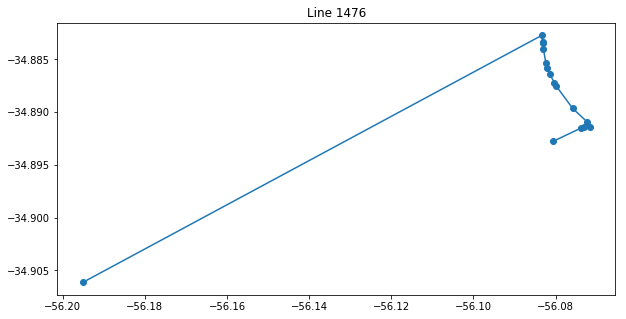

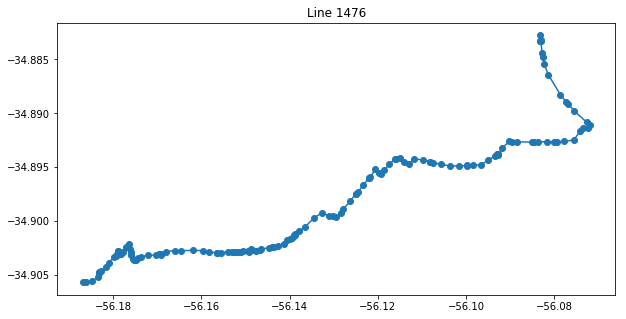

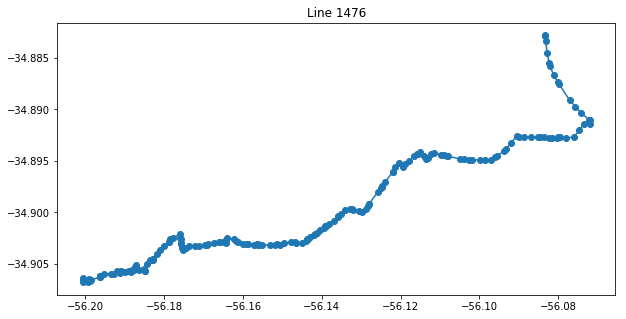

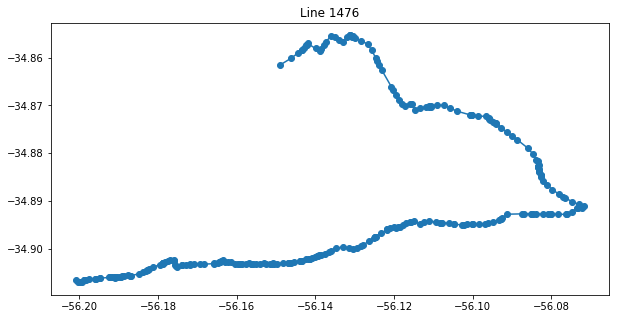

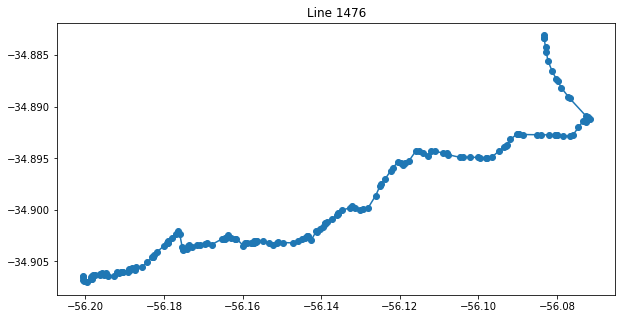

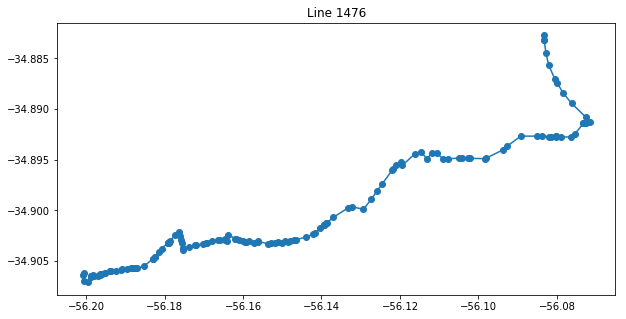

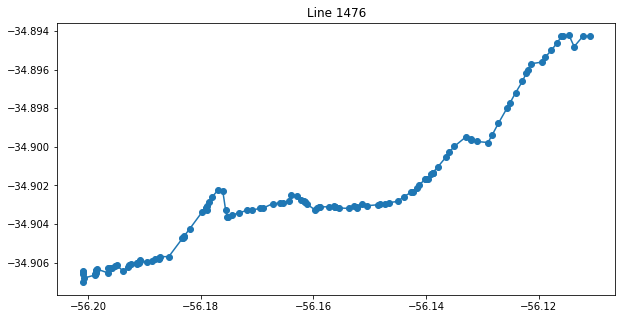

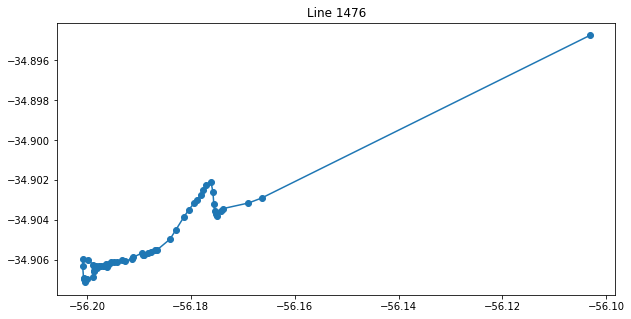

In [162]:
for id_ in line_1476_ids:
    plot_line(line_1476[line_1476.id == id_])

Ahora podemos ver que tenemos recorridos mas coherente. Aún asi vemos que algunos de los recorridos no son muy consistentes entre si.

Esto puede ser por:

* Variantes entre lineas.
* Recorridos de ida deiferentes a los de vuelta.
* Errores en los datos.

Vamos a comparar dos difernetes

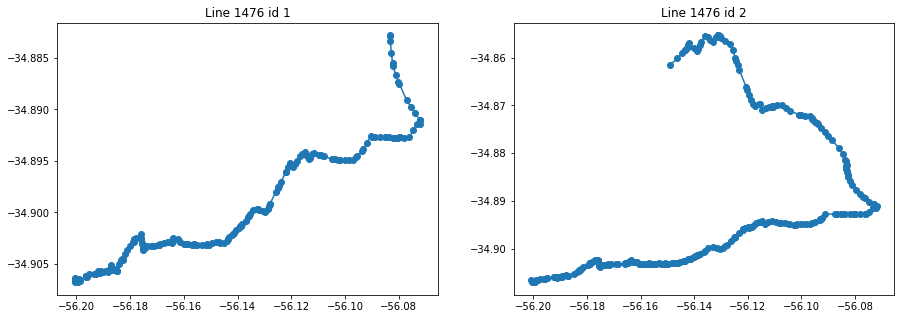

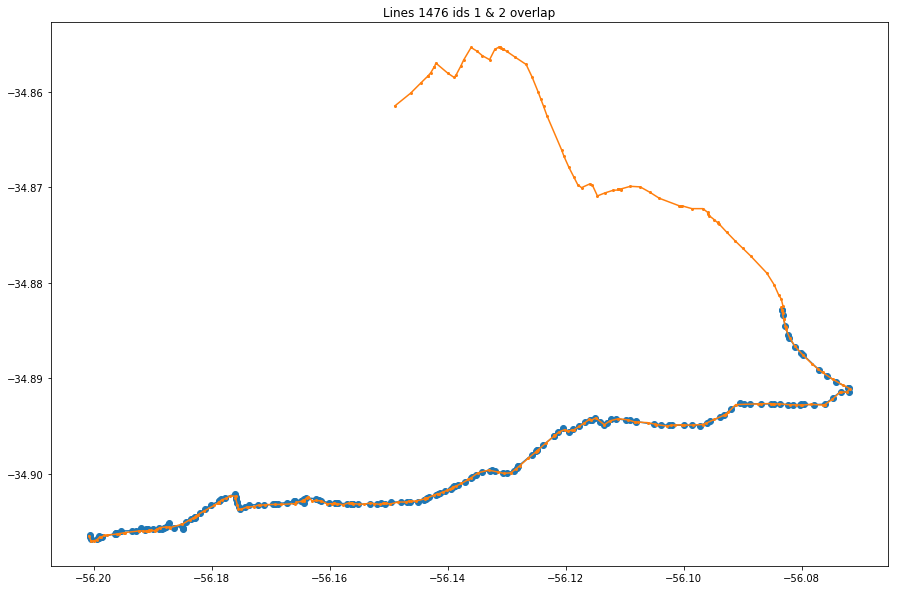

In [163]:
line_to_compare_1 = line_1476[line_1476.id == line_1476_ids[4]]
line_to_compare_2 = line_1476[line_1476.id == line_1476_ids[5]]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Line 1476 id 1')
plt.plot(line_to_compare_1.longitude, line_to_compare_1.latitude, '-o')
plt.subplot(122)
plt.title('Line 1476 id 2')
plt.plot(line_to_compare_2.longitude, line_to_compare_2.latitude, '-o')
plt.show()
plt.figure(figsize=(15,10))
plt.title('Lines 1476 ids 1 & 2 overlap')
plt.plot(line_to_compare_1.longitude, line_to_compare_1.latitude, '-o')
plt.plot(line_to_compare_2.longitude, line_to_compare_2.latitude, '-o', markersize=2)
plt.show()

Podemos ver que es la misma linea con la misma trayectoria solo que no completa el recorrido. Esto puede ser por:
* La simulacion se termino antes de obtener los puntos faltantes.
* Es una sublinea

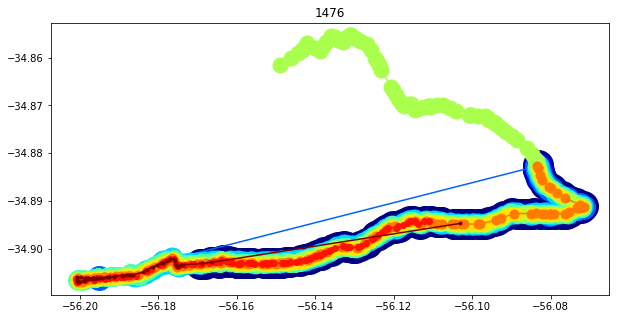

In [164]:
plot_ids_line(line_1476)

Podemos comprobar que todas las coordenadas forman parte de la misma linea, aun asi se pueden ver saltos importantes, es decir, periodos de tiempo en los cuales no se obtienen datos de las coorenadas del omnibus.

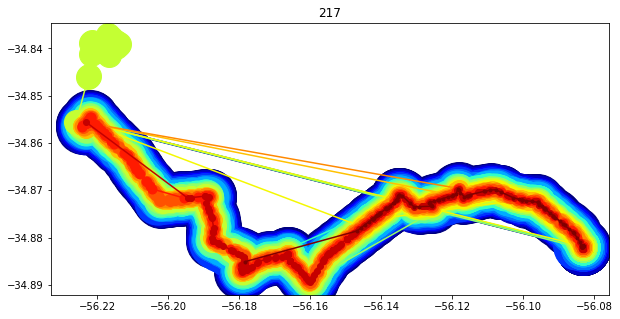

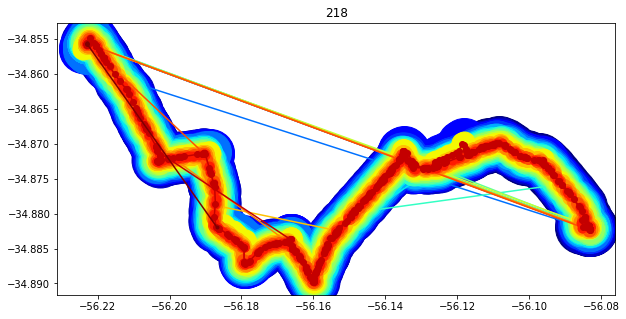

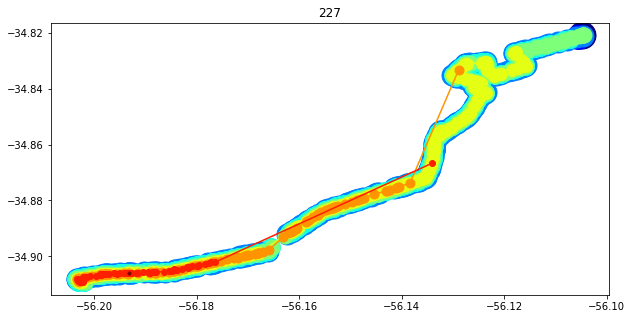

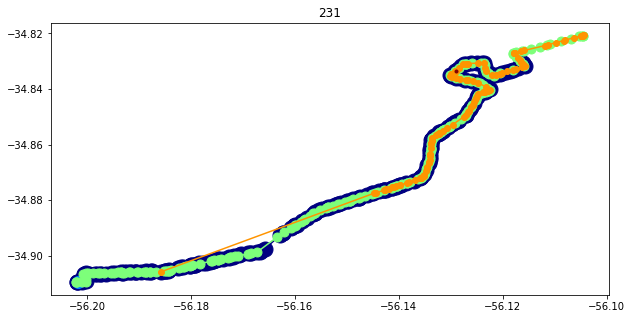

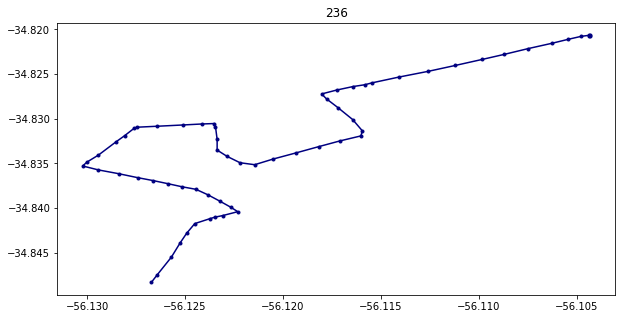

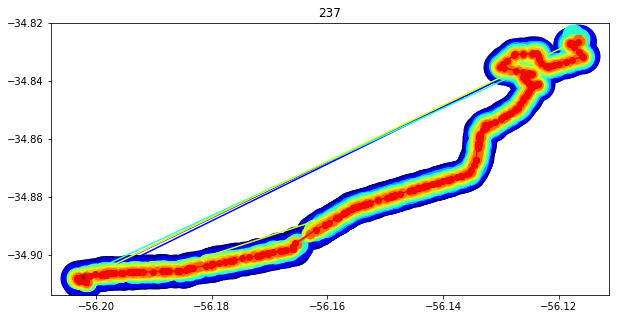

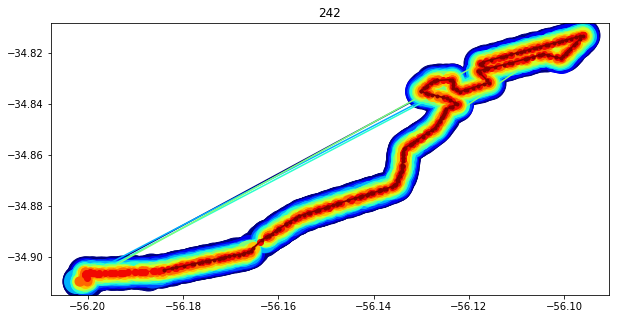

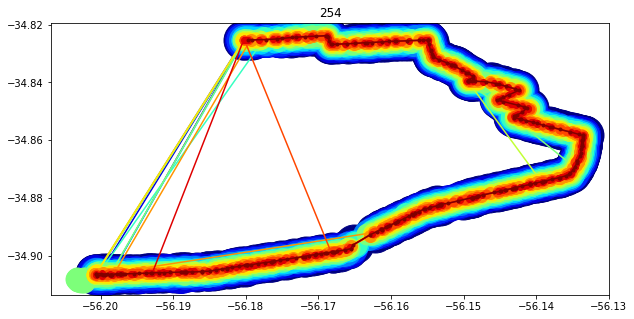

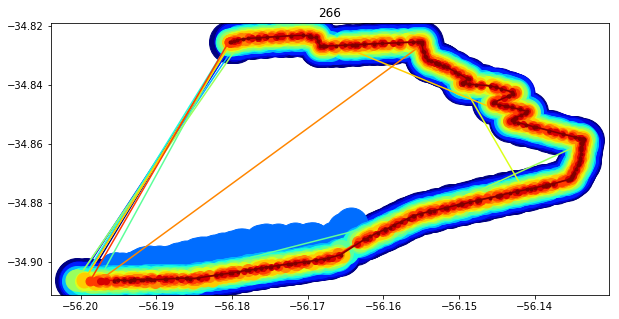

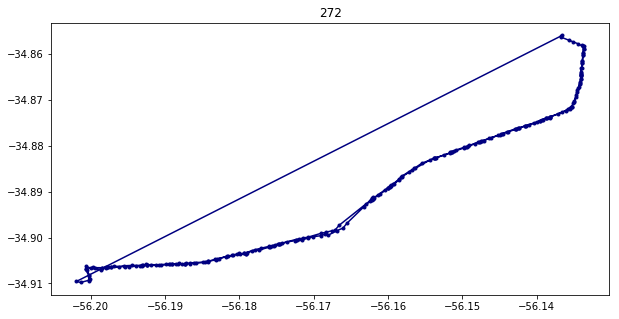

In [165]:
for line_number in line_numbers[:10]:
    plot_ids_line(lines[line_number])

Podemos ver saltos abruptos en casi todas las lineas. Ahora vamos a eliminar coordenadas que esten conectadas con una larga distancia.

Para calcular la distancia entre dos coordenadas vamos a utilizar **Haversine Formula**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/3547c826fa4abb6bcdf0d4d1de98aaa020ed91d6)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Law-of-haversines.svg/440px-Law-of-haversines.svg.png)

In [166]:
def distance_between(lat1, lon1, lat2, lon2):
    R = 6371e3; #meters
    φ1 = np.deg2rad(lat1)
    φ2 = np.deg2rad(lat2)
    Δφ = np.deg2rad(lat2-lat1)
    Δλ = np.deg2rad(lon2-lon1)

    a = np.sin(Δφ/2)*np.sin(Δφ/2) + np.cos(φ1)*np.cos(φ2)*np.sin(Δλ/2)*np.sin(Δλ/2)
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))

    d = R * c
    return d

Tomemos dos puntos arbitrarios para comprobar la implementacion.

In [167]:
distance_between(-34.890052, -56.187313, -34.887439, -56.132813)

4979.386812255401

Podemos comprobar que el metodo funciona correctamente.

![Haversine](./images/haversine.png)

Ahora tomemos una linea como ejemplo, en este caso 217 y calculemos las distancias entre las coorenadas consecutivas.

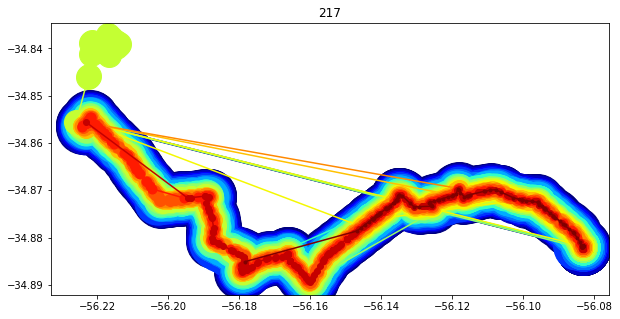

In [168]:
line_217 = lines[217]
plot_ids_line(line_217)

In [169]:
line_217_ids = line_217.id.unique()
line_217_ids

array([ 76,  68,  15,  13, 105,  91,  10,  45,  34,  29,  20,  90,  82,
        40,  99,  88,   5,  52])

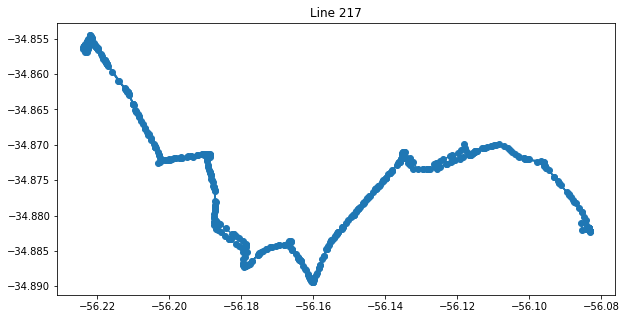

In [170]:
sub_line_217 = pd.DataFrame(line_217[line_217.id == line_217_ids[3]])
plot_line(sub_line_217)

In [171]:
sub_line_217.head()

,id,line,longitude,latitude,timestamp
51,13,217,-56.186050,-34.881200,2018-10-02 14:39:08
271,13,217,-56.187170,-34.880733,2018-10-02 14:39:23
394,13,217,-56.187435,-34.880634,2018-10-02 14:39:38
529,13,217,-56.187400,-34.880615,2018-10-02 14:39:53
662,13,217,-56.187584,-34.880200,2018-10-02 14:40:08


In [172]:
sub_line_217['next_longitude'] = sub_line_217.longitude.shift(-1)
sub_line_217['next_latitude']  = sub_line_217.latitude.shift(-1)
sub_line_217['next_timestamp'] = sub_line_217.timestamp.shift(-1)

In [173]:
sub_line_217.head()

,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp
51,13,217,-56.186050,-34.881200,2018-10-02 14:39:08,-56.187170,-34.880733,2018-10-02 14:39:23
271,13,217,-56.187170,-34.880733,2018-10-02 14:39:23,-56.187435,-34.880634,2018-10-02 14:39:38
394,13,217,-56.187435,-34.880634,2018-10-02 14:39:38,-56.187400,-34.880615,2018-10-02 14:39:53
529,13,217,-56.187400,-34.880615,2018-10-02 14:39:53,-56.187584,-34.880200,2018-10-02 14:40:08
662,13,217,-56.187584,-34.880200,2018-10-02 14:40:08,-56.187380,-34.879116,2018-10-02 14:40:23


In [174]:
sub_line_217['distance'] = np.zeros(len(sub_line_217))
sub_line_217['distance'] = sub_line_217.apply(lambda x: distance_between(sub_line_217.latitude,
                                                                          sub_line_217.longitude,
                                                                          sub_line_217.next_latitude,
                                                                          sub_line_217.next_longitude))

In [175]:
sub_line_times  = []
sub_line_speeds = []
sub_line_217.next_timestamp.iloc[-1] = sub_line_217.timestamp.iloc[-2]

for row in sub_line_217.itertuples():
    start_time = datetime.strptime(row.timestamp,'%Y-%m-%d %H:%M:%S')
    end_time   = datetime.strptime(row.next_timestamp,'%Y-%m-%d %H:%M:%S')
    time = end_time - start_time
    speed = row.distance/time.total_seconds()
    sub_line_times.append(time)
    sub_line_speeds.append(speed)

sub_line_217['time'] = np.zeros(len(sub_line_217))
sub_line_217['time'] = sub_line_times
sub_line_217['speed'] = np.zeros(len(sub_line_217))
sub_line_217['speed'] = sub_line_speeds
del sub_line_times
del sub_line_speeds

/Users/decemberlabs/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [176]:
sub_line_217.head()

,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp,distance,time,speed
51,13,217,-56.186050,-34.881200,2018-10-02 14:39:08,-56.187170,-34.880733,2018-10-02 14:39:23,114.603679,00:00:15,7.640245
271,13,217,-56.187170,-34.880733,2018-10-02 14:39:23,-56.187435,-34.880634,2018-10-02 14:39:38,26.561393,00:00:15,1.770760
394,13,217,-56.187435,-34.880634,2018-10-02 14:39:38,-56.187400,-34.880615,2018-10-02 14:39:53,3.828375,00:00:15,0.255225
529,13,217,-56.187400,-34.880615,2018-10-02 14:39:53,-56.187584,-34.880200,2018-10-02 14:40:08,49.103492,00:00:15,3.273566
662,13,217,-56.187584,-34.880200,2018-10-02 14:40:08,-56.187380,-34.879116,2018-10-02 14:40:23,121.963289,00:00:15,8.130886


In [177]:
sub_line_217.drop(['next_latitude','next_longitude','next_timestamp'], axis=1, inplace=True)
sub_line_217.head()

,id,line,longitude,latitude,timestamp,distance,time,speed
51,13,217,-56.186050,-34.881200,2018-10-02 14:39:08,114.603679,00:00:15,7.640245
271,13,217,-56.187170,-34.880733,2018-10-02 14:39:23,26.561393,00:00:15,1.770760
394,13,217,-56.187435,-34.880634,2018-10-02 14:39:38,3.828375,00:00:15,0.255225
529,13,217,-56.187400,-34.880615,2018-10-02 14:39:53,49.103492,00:00:15,3.273566
662,13,217,-56.187584,-34.880200,2018-10-02 14:40:08,121.963289,00:00:15,8.130886


In [178]:
sub_line_217.speed.mean()

4.028899993403776

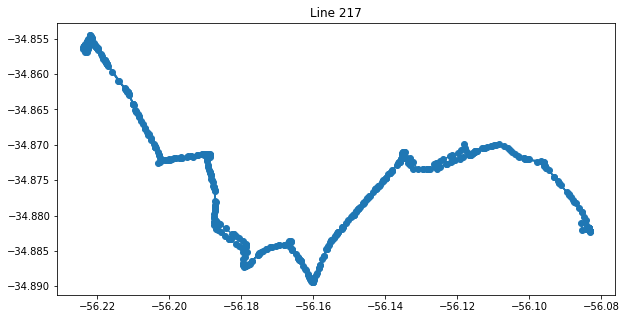

In [179]:
plot_line(sub_line_217)

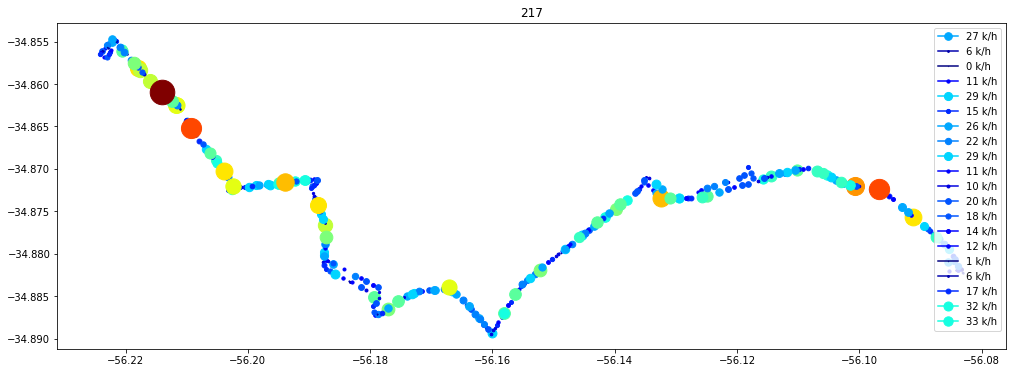

In [180]:
plot_line_speed(sub_line_217)

Podemos ver que algunas partes del camino se salen del recorrido, esto puede deberse a un desvio. Para conseguir mas información vamos a intentar mapear la id de las lineas a la linea del omnibus real. Para esto vamos a intruducir un nuevo archivo, `uv_uptu_lsv.csv` obtenido de los datos abiertos de la IMM (intendencia municipal de Montevideo)

In [181]:
uptu_data = pd.read_csv('../data/v_uptu_lsv.csv')
uptu_data.head()

,GID,COD_LINEA,DESC_LINEA,ORDINAL_SU,COD_SUBLIN,DESC_SUBLI,COD_VARIAN,DESC_VARIA
0,16009404,0,LINEA CERO,1,0,SUBLINEA CERO,0,NaN
1,16009406,1,402,1,1,CIUDAD VIEJA - MALVIN,8,A
2,16009407,2,404,1,2,CJO.J.AM├ëRICA - PCIO.DE LA LUZ,14,B
3,16009408,2,404,1,2,CJO.J.AM├ëRICA - PCIO.DE LA LUZ,20,A
4,16009409,3,405,1,3,PE├æAROL - PARQUE ROD├ô,24,B


Este archivo contiene:

* **Gid**         Código identificador de uso interno
* **Cod_linea**   Código de la línea de transporte
* **Desc_linea**  Descripción de la línea de transporte (ej: 145, D10, etc)
* **Ordinal_su**  Número correlativo de la sublinea en la línea
* **Cod_sublin**  Código de la sublínea de recorrido
* **Desc_subli**  Descripción de la sublínea de recorrido (ej: ADUANA-PORTONES)
* **Cod_varian**  Código de la variante de recorrido (para vincular con v_uptu_parada)
* **Desc_varia**  Descripción de la variante (Se asigna sentido A, a todas las líneas que circulan con destino hacia la zona sur del departamento (Ciudad Vieja, Centro, Cordón, P. Rodó, P. Carretas, Pocitos, Buceo, Malvín), además de todas las líneas que atraviesan esta zona en sentido Oeste-Este. Se asigna sentido B, a todas las líneas en sentido contrario al antes mencionado.

Vamos a eliminar la primera fila ya que no aprota informacion, el codigo de uso interno, ordinal, y codigo de linea.

In [182]:
uptu_data.drop(['GID','COD_LINEA','ORDINAL_SU'], axis=1, inplace=True)
uptu_data.drop(uptu_data.index[0], inplace=True)
uptu_data.head()

,DESC_LINEA,COD_SUBLIN,DESC_SUBLI,COD_VARIAN,DESC_VARIA
1,402,1,CIUDAD VIEJA - MALVIN,8,A
2,404,2,CJO.J.AM├ëRICA - PCIO.DE LA LUZ,14,B
3,404,2,CJO.J.AM├ëRICA - PCIO.DE LA LUZ,20,A
4,405,3,PE├æAROL - PARQUE ROD├ô,24,B
5,405,246,GRUTA DE LOURDES - PARQUE RODO,28,B


Ahora vamos a ver cual es el nombre real de la linea con la que trabajamos _217_

In [183]:
uptu_data[uptu_data.COD_VARIAN==217]

,DESC_LINEA,COD_SUBLIN,DESC_SUBLI,COD_VARIAN,DESC_VARIA
23,546,22,BELVEDERE - PORTONES,217,B


Vemos que es el 546, buscamos su recorrido y efectivamente comprobamos que los datos son correctos

![546](./images/line_546.png)

En la proxima sección vamos a realizar estos ultimmos pasos para todos los datos y obtendremos distancias y velocidades.